#Task 1

Implement nonlinear Transformation functions:
<ol>
<li> Log Transformation </li>
<li> Power-law Transformation </li>
</ol>

In [9]:
import  numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [22]:
def log_transform(gray_image):
  #implement this function
  img_array = np.asarray(gray_image)
  img_array = np.asarray(gray_image)
  log_image = np.log(1 + img_array)
  log_image = log_image / np.max(log_image)
  log_image = (log_image * 255).astype(np.uint8)

  return log_image

def power_transform(gray_image, gamma):
   #implement this function
    img_array = np.asarray(gray_image)
    img_normalized = img_array / 255.0
    power_image = np.power(img_normalized, gamma)
    power_image = (power_image * 255).astype(np.uint8)

    return power_image


# Task 1: Output and Analysis
Use your previously implemented functions to show the outputs of log transform and power transform on a sample image. Provide your analysis on the following topics:
<ol>
<li> Which function is suitable for which type of images? </li>

<li> Why is intensity scaling required before display? </li>
</ol>

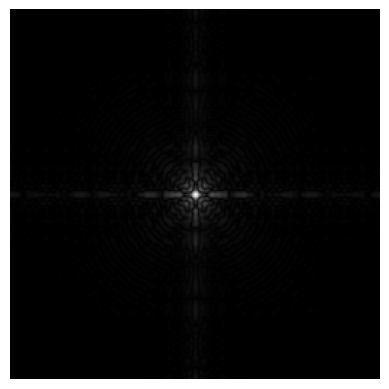

<ipython-input-22-25f84f574d78>:5: RuntimeWarning: divide by zero encountered in log
  log_image = np.log(1 + img_array)
<ipython-input-22-25f84f574d78>:7: RuntimeWarning: invalid value encountered in cast
  log_image = (log_image * 255).astype(np.uint8)


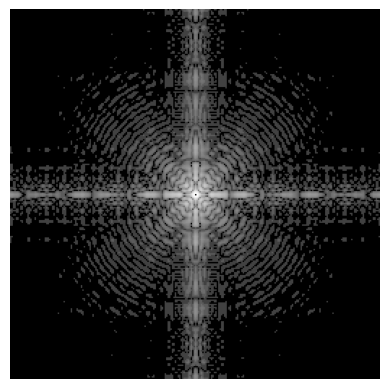

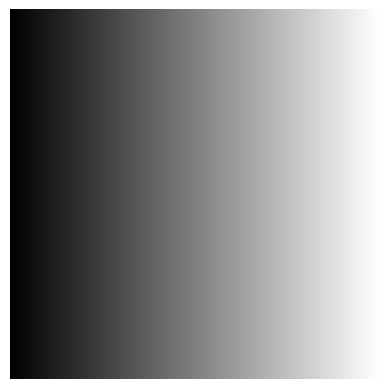

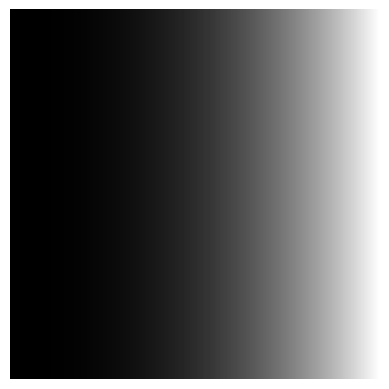

In [26]:
# Generate outputs for Task 1 here
img = Image.open('log_img.tif')
img_array = np.asarray(img)
plt.imshow(img_array,cmap='gray')
plt.axis('off')
plt.show()
#log_transformed
logimg_array = log_transform(img_array)
plt.imshow(logimg_array,cmap='gray')
plt.axis('off')
plt.show()
#original image 2
img2=Image.open('gamma_img.tif')
img2_array=np.asarray(img2)
plt.imshow(img2_array,cmap='gray')
plt.axis('off')
plt.show()
#power transform

gamma_image=power_transform(img2_array,2.5)
plt.imshow(gamma_image,cmap='gray')
plt.axis('off')
plt.show()

# Task 2
Implement Global Histogram Equalization on gray-scale images

In [33]:
def my_histogram(gray_image):
  #implement this function
  img_array = np.asarray(gray_image)

  histogram= [0] *256
  flattened_img = img_array.flatten()
  for pixel_value in flattened_img:
        histogram[pixel_value] += 1

  return histogram

In [34]:
def global_HistEqual(gray_image):
  #implement this function
  histogram=my_histogram(gray_image)
  cdf = np.cumsum(histogram)
  cdf_normalized = cdf * 255 / cdf[-1]
  cdf_normalized = np.round(cdf_normalized).astype(np.uint8)
  global_equalized_image = cdf_normalized[img_array]

  return global_equalized_image,

# Task 2: Output and Analysis
Use your previously implemented function to show the output of global histogram equalization on a sample image. Provide your analysis on the following topic:
<ol>
<li> Why repeated application of Histogram Equalization doesn't produce any further improvements on output images? </li>
</ol>

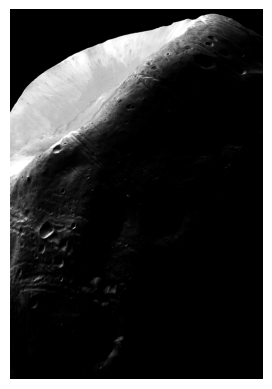

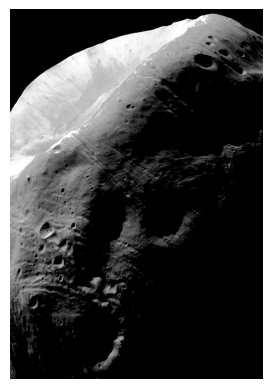

In [35]:
#Generate output for Task 2 here
img = Image.open('hist4_img.tif')
img_array = np.asarray(img)
plt.imshow(img_array,cmap='gray')
plt.axis('off')
plt.show()
#Histogram equalized image
histEq_img_array =global_HistEqual(img_array)
plt.imshow(histEq_img_array ,cmap='gray')
plt.axis('off')
plt.show()

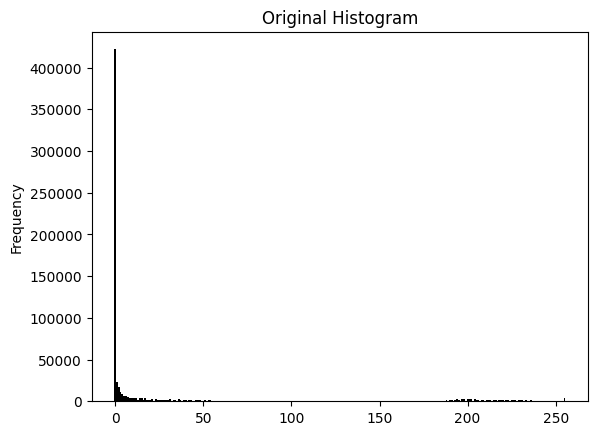

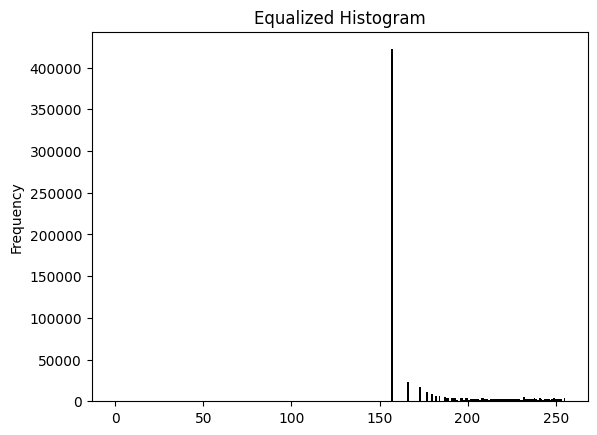

In [37]:
histogram = my_histogram(img)

####
plt.bar(range(256), histogram, width=1.0, color='black')
plt.ylabel('Frequency')
plt.title('Original Histogram')
plt.show()
####equalized histogram
eq_histogram=my_histogram(global_HistEqual(img_array))
plt.bar(range(256), eq_histogram, width=1.0, color='black')
plt.ylabel('Frequency')
plt.title('Equalized Histogram')
plt.show()

# Task 3

Implement Local Histogram Equalization (LHE) on gray scale images.


In [38]:
def local_HistEqual(gray_image, stride):
    img_array = np.asarray(gray_image)
    height, width = img_array.shape
    local_equalized_image = np.zeros_like(img_array)

    for i in range(0, height, stride):
        for j in range(0, width, stride):
            window = img_array[i:i+stride, j:j+stride]
            histogram = [0] * 256
            flattened_window = window.flatten()
            for pixel_value in flattened_window:
                histogram[pixel_value] += 1

            cdf = np.cumsum(histogram)
            cdf_normalized = cdf * 255 / cdf[-1]
            cdf_normalized = np.round(cdf_normalized).astype(np.uint8)
            equalized_window = cdf_normalized[window]
            local_equalized_image[i:i+stride, j:j+stride] = equalized_window

    return local_equalized_image


# Task 3: Output and Analysis
Use your previously implemented function to show the output of local histogram equalization on a sample image. Provide your analysis on the following topic:
<ol>
<li> Why do you have annoying side effects at the boundary of local image regions? </li>
<li> What is the effect of changing the stride? </li>
</ol>

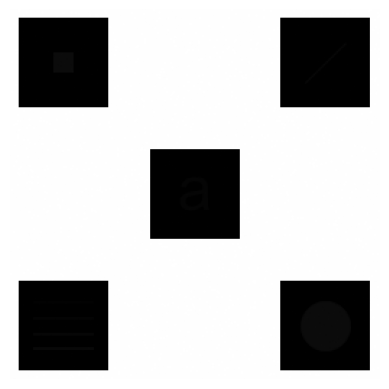

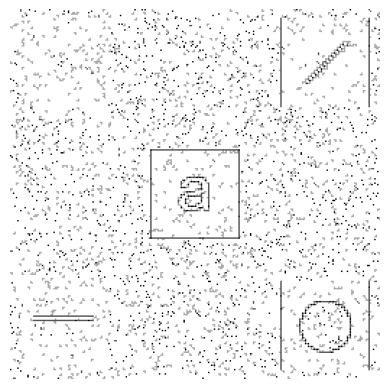

In [47]:
#Generate output for Task 2 here
img = Image.open('local_hist.tif')
img_array = np.asarray(img)
plt.imshow(img_array,cmap='gray')
plt.axis('off')
plt.show()
#Histogram equalized image
histEq_img_array =local_HistEqual(img_array,4)
plt.imshow(histEq_img_array ,cmap='gray')
plt.axis('off')
plt.show()

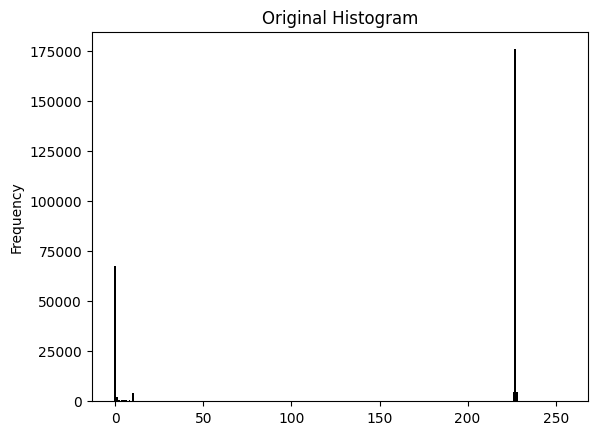

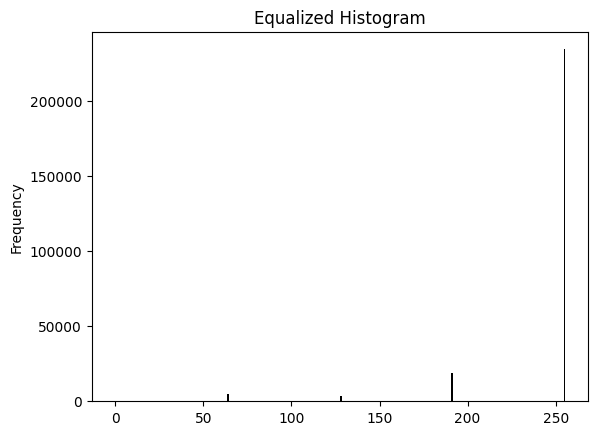

In [48]:
#Generate output for Task 3 here
histogram = my_histogram(img)

####
plt.bar(range(256), histogram, width=1.0, color='black')
plt.ylabel('Frequency')
plt.title('Original Histogram')
plt.show()
####equalized histogram
eq_histogram=my_histogram(local_HistEqual(img_array,4))
plt.bar(range(256), eq_histogram, width=1.0, color='black')
plt.ylabel('Frequency')
plt.title('Equalized Histogram')
plt.show()